# 中文斷詞
* 中文的「字詞」是獨立的意義單元，在閱讀時，讀者通常會下意識地先斷詞，再理解原意。
* 如果斷錯詞，語意將難以理解。進行文字探勘時，通常要先斷詞，斷詞的正確與否會影響其後的分析。
* 本週，我們介紹一個簡便的斷詞模組：結巴(Jieba)。它最大的好處是簡單易用，而且可以自己新增詞彙，校正錯誤。
* 不過即使如此，我們還是無保證斷詞完全正確，因為中文實在太複雜了。

## 結巴斷詞

* 官方網頁   https://github.com/fxsjy/jieba
* 使用前要先安裝, 在命令提示字元
* pip install jieba,  easy_install jieba  或者 pip3 install jieba 
* 半自動安裝：先下載 http://pypi.python.org/pypi/jieba/ ，解壓縮後 python setup.py install 
* 手動安裝：將 jieba 目錄放置於當前目錄，或者 site-packages 目錄 (C:\Users\user\Anaconda3\Lib\site-packages)

In [1]:
import jieba
import re

In [2]:
#####################################################################
import pandas as pd
path='d:/My python/'
df=pd.read_csv(path+"_PTT/Gossiping_ran2019_5000_token.csv", index_col=None)
df

,Unnamed: 0,name,ym,title,date,month,year,push,trash,text,token
0,0,mike143677 (包子大撒避),201910,[問卦] 鳳梨蝦球的鳳梨是不是超級冗員？,2019-Oct-19,Oct,2019.0,17,7,小弟超愛吃鳳梨蝦球這道菜但是絕對不吃鳳梨以往餐桌上的鳳梨蝦球也是蝦球吃光光鳳梨只能慘遭丟進廚...,小弟 超愛吃 鳳梨 蝦球 這 道菜 但是 絕對 不吃 鳳梨 以往 餐桌上 的 鳳梨 蝦球 也...
1,1,kent21413 (kent),201910,[問卦] 慟！再一個月一年又結束了,2019-Nov-23,Nov,2019.0,4,1,是這樣的再一個月又要跨年呢好像有點快一年過去各位有甚麼還沒有完成的事情嗎剩一個月可以做甚麼大事卦,是 這樣 的 再 一個月 又 要 跨 年 呢 好像 有點 快 一年 過去 各位 有 甚麼 還...
2,2,abx310492 (胖宅男),201907,[問卦] 微軟是不是放棄IE了,2019-Aug-25,Aug,2019.0,16,1,剛電腦重灌裝完要把它設為預設瀏覽器時發現點一下就好了以前微軟還會要你確認真的不用嗎是不是被放...,剛 電腦 重 灌裝 完要 把 它 設為 預設 瀏覽器 時 發現 點 一下 就 好 了 以前 ...
3,3,Metallicat (金屬製貓),201908,[問卦] 我根本不屑中秋烤肉這種商業操作?陋習,2019-Sep-10,Sep,2019.0,11,2,中秋節是拿來賞月吃月餅柚子不知何時台灣人被烤肉醬公司給洗腦覺得中秋一定要烤肉變全民運動其實烤...,中秋節 是 拿來 賞月 吃 月餅 柚子 不知 何時 臺灣人 被 烤肉醬 公司 給 洗腦 覺得...
4,4,IamCuteGirl (CuteGirl5566),201908,Re: [問卦] 哪邊有賣帥哥西裝啊 ☹,2019-Oct-17,Oct,2019.0,0,0,笨笨你沒看懂原意啦那個帥哥西裝是指不管高矮胖瘦身上有了變帥西裝錢大家都會尊敬喜歡驚訝暗戀從攝...,笨笨 你 沒 看 懂 原意 啦 那個 帥哥 西裝 是 指 不管 高矮 胖瘦 身上 有 了 變...
5,5,ccxx9999 (0-0),201910,[問卦] 真的以前有半年就考上台大甚至醫科的嗎,2019-Sep-16,Sep,2019.0,8,2,真的以前建中北一有人高中玩很瘋都沒在唸書只靠半年狂唸書就考上台大甚至醫科的嗎,真的 以前 建中 北 一 有人 高中 玩 很 瘋 都 沒 在 唸書 只靠 半年 狂 唸書 就...
6,6,cores (24番),201910,[新聞] 談司法改革 陳師孟嘆：豬吠火車,2019-Oct-27,Oct,2019.0,6,9,談司法改革陳師孟嘆豬吠火車自由時報〔記者鍾麗華台北報導〕監委陳師孟在最新的尖尾週記表示他一個...,談 司法 改革 陳 師孟嘆 豬吠 火車 自由 時報 〔 記者 鍾 麗華 臺北 報導 〕 監委...
7,7,Pcom (Pcom),201910,Re: [新聞] 「貪污說」惹怒蔡英文幕僚 柯文哲嗆：我,2019-Aug- 5,Aug,2019.0,4,2,我是這樣認為啦柯文哲本人應該到地檢署按鈴告發他所認為的每位蔡英文旁邊有貪污的人民進黨的選戰策...,我 是 這樣 認為 啦 柯文哲 本人 應該 到 地 檢署 按鈴 告發 他 所 認為 的 每位...
8,8,Number87 (人畜無害),201911,[問卦]最近是喇牙的盛產期嗎,2019-Aug- 4,Aug,2019.0,6,2,餓死抬頭最近真的真的一直發現家裡外面裡面都有喇牙的蹤跡真的是異常的頻繁出現我知道喇牙是益蟲但...,餓死 抬頭 最近 真的 真的 一直 發現 家裡 外面 裡面 都 有 喇牙 的 蹤跡 真的 是...
9,9,pchunters123 (pp),201910,[新聞] 集集彩繪列車調整石虎設計 全新圖樣出爐,2019-Aug-27,Aug,2019.0,14,8,新頭殼謝佳真集集彩繪列車調整石虎設計全新圖樣出爐集集彩繪列車因為設計師江孟芝使用圖庫圖片做為...,新 頭殼 謝佳真 集集 彩繪 列車 調整 石虎 設計 全新 圖樣 出爐 集集 彩繪 列車 因...


In [3]:
# 刪除無值的紀錄
df.token.isnull().value_counts()
df.token=df.token.fillna(999)
delete=df[df.token==999].index.tolist()
print (len(delete))
df=df.drop(delete)
df.index=range(len(df))

0


In [4]:
# 刪除非字串
delete=[]
for n in range(len(df)):
    try:
        if (type(df.token[n])!= str) or (len(df.token)<1):
            delete.append(n)
    except:
        delete.append(n)
print (len(delete))     
df=df.drop(delete)
df.index=range(len(df))

0


In [5]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

# 潛在語意
* 字詞在不同向度上的投影，依投影值大小排序，大者歸為一類，代表這個向度是由這些字詞所構成。
* 字詞-文章矩陣(tdm)，SVD降維
* CountVectorizer() 文章字詞矩陣 DTM 無加權
* TfidfVectorizer() 文章字詞矩陣 DTM 有加權
* 都做一遍，同學可比較其差異

# 降維

In [6]:
docs=list(df.token)
docs[0]

'小弟 超愛吃 鳳梨 蝦球 這 道菜 但是 絕對 不吃 鳳梨 以往 餐桌上 的 鳳梨 蝦球 也 是 蝦球 吃 光光 鳳梨 只能 慘遭 丟進 廚餘桶 鳳梨 蝦球 的 鳳梨 其實 是 超級 多餘 超級 冗員 吧 冗員 程度 堪稱 樂團 貝斯手 有沒有 八卦 '

In [46]:
# documents 為 list 元素為 string
num_i=500    # number of concepts
num_t=10    # number of items shown

# 文章字詞矩陣，沒有加權 ****注意單辭被排除在外
#vectorizer = CountVectorizer(min_df = 1,ngram_range= (0,1))  
#count = vectorizer.fit_transform(docs) 

# 或者 tfidf 加權 ****注意單辭被排除在外
vectorizer1 = TfidfVectorizer(min_df = 1,ngram_range= (0,1) )  
tfidf = vectorizer1.fit_transform(docs) 

# 字詞文章矩陣，轉置 **** 注意先轉置
#tdm_count=count.transpose() 
tdm_tfidf=tfidf.transpose() 

# SVD 降維以後的結果 
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object    

# 各字詞在各維度上的投影，亦即將字詞變成向量
# lsa_count = svd.fit_transform(tdm_count)  # numpy array  
lsa_tfidf = svd.fit_transform(tdm_tfidf)  # numpy array  

# 標準化
# lsa_count_n = Normalizer(copy=False).fit_transform(lsa_count)   
lsa_tfidf_n1 = Normalizer(copy=False).fit_transform(lsa_tfidf)   

# 字詞的 list
terms=vectorizer1.get_feature_names()   

# 降維後所能解釋的變異
v1=svd.explained_variance_
v2=svd.explained_variance_ratio_
v3=svd.explained_variance_ratio_.sum()
print ('能解釋的變異',v1)
print ('能解釋的變異%',v2)
print ('能解釋的變異%總和',v3)

能解釋的變異 [8.93767695e-04 3.26332098e-04 2.59986744e-04 1.90283246e-04
 1.78609840e-04 1.57498785e-04 1.46209230e-04 1.39742961e-04
 1.23552944e-04 1.22566093e-04 1.20151222e-04 1.13444973e-04
 1.10305482e-04 1.06718389e-04 1.04461547e-04 1.03034888e-04
 1.00501266e-04 9.97219261e-05 9.82803174e-05 9.58911675e-05
 9.50936106e-05 9.43344275e-05 9.16084731e-05 9.09703314e-05
 8.97918673e-05 8.92802652e-05 8.87485176e-05 8.82439173e-05
 8.71974560e-05 8.52273277e-05 8.42389475e-05 8.28460548e-05
 8.21448433e-05 8.09301404e-05 7.99616806e-05 7.96802074e-05
 7.85075501e-05 7.78335892e-05 7.71490938e-05 7.67465746e-05
 7.61804197e-05 7.56676903e-05 7.42263646e-05 7.36882843e-05
 7.33586502e-05 7.31884436e-05 7.23439236e-05 7.21589491e-05
 7.14987975e-05 7.10996101e-05 7.07317928e-05 7.06221983e-05
 7.02941301e-05 6.94091277e-05 6.86807697e-05 6.82448882e-05
 6.82209443e-05 6.77429250e-05 6.74538339e-05 6.67169091e-05
 6.63919624e-05 6.62844939e-05 6.55477755e-05 6.54367569e-05
 6.52758353e-05 6

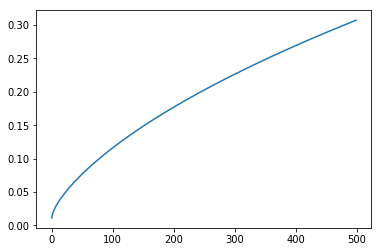

In [47]:
y=[]
cum=0
for v in range(len(v1)):
    cum=cum+v2[v]
    y.append(cum)
y=np.array(y)
plt.plot(y[0:num_i])
plt.show()

In [48]:
# 所有的字詞
len(terms)
print (terms[0:100])

['一一', '一丁點', '一七', '一三立', '一上', '一上臺', '一下', '一下子', '一下手', '一下站', '一不小心', '一中', '一中一臺', '一中原則', '一中各表', '一串', '一主播', '一久', '一九', '一九八六年', '一事', '一事無成', '一二', '一二三', '一二十年', '一二四', '一二天', '一些', '一些則', '一亮', '一人', '一人之下', '一人夠', '一人拉', '一人滿', '一人還', '一仗', '一付', '一代', '一代人', '一代代', '一以貫之', '一件', '一任', '一份', '一休', '一休區', '一位', '一併', '一來', '一來一往', '一例', '一例一休', '一信', '一修', '一個', '一個中國', '一個個', '一個億', '一個半', '一個半月', '一個名', '一個多月', '一個家', '一個月', '一個樣', '一個男孩', '一個系列', '一個紙', '一個雙', '一個頂', '一個點', '一倍', '一做', '一億', '一億多', '一兆', '一入', '一兩個', '一兩分鐘', '一兩千', '一兩天', '一兩年', '一兩次', '一兩秒', '一兩篇', '一兩間', '一兩點', '一共', '一兵一卒', '一其', '一兼二顧', '一再', '一再強調', '一再表示', '一出', '一刀', '一刀切', '一分', '一分錢']


# 概念萃取

In [49]:
def lsa_concept(model_lsa, terms, num_t, num_i):    
    final=[]
    for i, comp in enumerate(model_lsa.T):
        termsInComp=zip(terms,comp)
        # 依重要性 x[1] 排序，取前 num_t名，找尋在每個向度，投影值最大者
        sortedTerms=sorted(termsInComp, key=lambda x: x[1],reverse=True)[:num_t]
        sub_final=[]
        for term in sortedTerms:
             sub_final.append(term[0]+'('+str(round(term[1],2))+')')
        final.append(sub_final)     

    # final 轉置
    final = [[final[j][i] for j in range(len(final))] for i in range(len(final[0]))]
    
    # 概念構成表 
    s = pd.DataFrame(final, index=range(num_t), columns=range(num_i))
    return s

In [50]:
# lsa_tfidf 各字詞在 num_i 個主題空間上的投影 
print ("字詞數", len(lsa_tfidf))
print ("字詞", terms[0])
print ("字詞投影", lsa_tfidf[0])

字詞數 63095
字詞 一一
字詞投影 [ 1.32113413e-01  1.23257377e-01 -5.74725567e-02  2.57545075e-02
 -7.81113925e-02 -1.52272183e-03 -5.59259371e-02  4.68907887e-02
 -4.02490820e-02 -7.25539798e-02  1.27439786e-03 -3.23184425e-02
  3.66300233e-02  2.76102184e-02 -1.16682402e-02  2.43507380e-03
 -2.30807153e-02 -4.91612497e-02  2.17476634e-02  5.21076900e-02
 -2.95293638e-02 -7.03395189e-02  5.07421782e-02  3.35975739e-02
 -2.25029063e-02  7.62268691e-02 -1.18634801e-02  4.42033025e-02
  1.45004555e-02 -9.41370405e-02  2.88531966e-02  1.63535315e-03
  4.49902247e-02 -6.07136708e-02 -8.89818256e-03 -2.79142282e-02
 -3.42205553e-02 -5.70330627e-02 -2.46231389e-02  2.87874982e-02
 -4.78053241e-02 -6.20275583e-02 -1.75309813e-02 -9.37163436e-03
  3.45363432e-02  3.23336149e-03  5.06221981e-03 -1.51112241e-02
  2.72122663e-02 -1.74316264e-02  2.66343428e-03 -1.65986224e-03
  6.45070162e-02  2.44699786e-02 -2.97990091e-02  5.28666541e-03
 -8.89051319e-03  3.08890689e-02 -1.23279337e-02  5.19219451e-03
  3.

In [51]:
# lsa_tfidf,num_i 個維度，主要構成的字詞 
num_t=30
df_concept=lsa_concept(lsa_tfidf, terms, num_t,num_i)
df_concept

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,臺灣(0.53),署名(0.54),香港(0.52),香港(0.57),香港(0.41),八卦(0.46),中國(0.49),柯文哲(0.77),日本(0.62),韓國瑜(0.44),...,週刊(0.19),嚇死人(0.22),威爾(0.2),七輪(0.18),採納(0.25),加一點(0.18),明燈(0.21),全面戰爭(0.19),中研院(0.21),咬掉(0.24)
1,就是(0.53),備註(0.54),中國(0.48),抓捕(0.44),柯文哲(0.31),有沒有(0.45),美國(0.36),楊亞(0.57),上留(0.44),差遠了(0.34),...,民主進步黨(0.19),不降(0.22),或將(0.2),三脈(0.18),下一階段(0.25),兩權(0.17),龍山寺(0.2),核子武器(0.19),一千三百(0.2),山難(0.24)
2,什麼(0.46),短網址(0.53),臺灣(0.44),五虎(0.43),民進黨(0.31),臺灣(0.35),理事會(0.35),師團(0.56),列島(0.44),平分秋色(0.34),...,三張(0.19),昭和(0.22),史密斯(0.2),不得要領(0.18),並能(0.25),刊出(0.17),應變能力(0.2),公布(0.19),一歲(0.2),水難(0.24)
3,沒有(0.46),新聞標題(0.53),泰國人(0.42),做匠(0.43),幫柯(0.29),現籍(0.26),高級官員(0.35),乾妹(0.56),武士道(0.44),清標(0.34),...,中回(0.19),神猛(0.22),遊子(0.19),二脈(0.18),全球定位系統(0.25),黨和人民(0.17),付之一炬(0.2),流暢(0.18),不愛念書(0.2),熟睡(0.24)
4,可以(0.46),完整(0.53),緬甸人(0.42),天團(0.43),澳州(0.29),掉以輕心(0.25),不睦(0.35),伏筆(0.56),試爆(0.44),遲到早退(0.34),...,全景(0.19),閒閒(0.22),億英鎊(0.19),以三脈(0.18),同步進行(0.25),吃法(0.16),全面禁止(0.2),美國國防部(0.18),並按(0.2),財還(0.24)
5,不是(0.44),連結(0.52),串聯(0.36),天團溫(0.43),壞事(0.29),韓國瑜(0.25),以眾國(0.35),但王(0.56),會戰(0.39),還和顏(0.34),...,利於(0.19),舊有(0.2),創刊(0.19),任督(0.18),感測器(0.25),燒酒(0.16),周中祺(0.2),建案(0.18),五千元(0.2),成本低(0.22)
6,自己(0.44),內文(0.51),電拼(0.36),林子祥(0.43),不吹柯(0.28),十團(0.25),切入點(0.35),何瑞英(0.56),趕忙(0.39),下風(0.32),...,彩英(0.19),文章內容(0.19),發行量(0.19),來引(0.18),慣性導航(0.25),田螺(0.16),學程(0.2),是貓(0.18),仍能(0.2),救難(0.2)
7,現在(0.43),來源(0.51),同屬(0.34),歌神(0.43),不對連(0.28),杜汶澤(0.25),友國(0.35),何等(0.56),夜遊(0.37),事選(0.32),...,惠利(0.19),手手(0.19),罹患(0.18),再說下去(0.18),慧龍(0.25),蝸牛(0.16),宗祠(0.2),橘貓(0.18),八十一個(0.2),養狗(0.19)
8,所以(0.42),指出(0.5),題為(0.34),許冠傑(0.43),不滾(0.28),香港藝人(0.25),周二(0.35),力促(0.56),出口國(0.36),呂欣(0.32),...,惠利姐(0.19),卡拉(0.18),不接(0.18),前三關(0.18),期國(0.25),螺有(0.16),巴黎聖母院(0.2),綠葉(0.18),八歲時(0.2),奇妙(0.19)
9,一個(0.41),對此(0.47),金融中心(0.33),譚詠麟(0.43),分泌物(0.28),先炸後醬(0.24),嘉儀(0.35),動腦筋(0.56),分四(0.36),感受力(0.32),...,惠利還(0.19),五小時(0.18),並和(0.18),吸氣(0.18),水下(0.25),解套(0.16),怡菁(0.2),肥橘(0.18),創業者(0.2),五元(0.19)


# select features 若無需要則跳過
* 依tfidf 篩選 select features
* 簡化各篇文章，只取分數較高的 features否
* 可節省記憶體
* 會打亂字詞順序

In [52]:
# 篩選字詞，tfidf > crit 者 視需要而定
feature=[]
for t in tfidf:
    a=t.toarray()
    term=[]    
    n=-1
    for v in a[0]:
        n+=1      
        if v>0.1:           
            term.append(terms[n])
    string=' '.join(term)        
    feature.append(string)

In [53]:
# select features 與原始文字 比較
n=0
print (df.token[n])
print ("********")
print (feature[n])

小弟 超愛吃 鳳梨 蝦球 這 道菜 但是 絕對 不吃 鳳梨 以往 餐桌上 的 鳳梨 蝦球 也 是 蝦球 吃 光光 鳳梨 只能 慘遭 丟進 廚餘桶 鳳梨 蝦球 的 鳳梨 其實 是 超級 多餘 超級 冗員 吧 冗員 程度 堪稱 樂團 貝斯手 有沒有 八卦 
********
丟進 冗員 堪稱 多餘 廚餘桶 慘遭 蝦球 貝斯手 超愛吃 超級 道菜 餐桌上 鳳梨


In [54]:
df['feature']=feature

In [55]:
df.to_csv( path +"_PTT/Gossiping_ran2019_5000_token_feature.csv") 
#####################################################################
import pandas as pd
path='d:/My python/'
df=pd.read_csv(path+"_PTT/Gossiping_ran2019_5000_token_feature.csv", index_col=None)
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,name,ym,title,date,month,year,push,trash,text,token,feature
0,0,0,0,mike143677 (包子大撒避),201910,[問卦] 鳳梨蝦球的鳳梨是不是超級冗員？,2019-Oct-19,Oct,2019.0,17,7,小弟超愛吃鳳梨蝦球這道菜但是絕對不吃鳳梨以往餐桌上的鳳梨蝦球也是蝦球吃光光鳳梨只能慘遭丟進廚...,小弟 超愛吃 鳳梨 蝦球 這 道菜 但是 絕對 不吃 鳳梨 以往 餐桌上 的 鳳梨 蝦球 也...,丟進 冗員 堪稱 多餘 廚餘桶 慘遭 蝦球 貝斯手 超愛吃 超級 道菜 餐桌上 鳳梨
1,1,1,1,kent21413 (kent),201910,[問卦] 慟！再一個月一年又結束了,2019-Nov-23,Nov,2019.0,4,1,是這樣的再一個月又要跨年呢好像有點快一年過去各位有甚麼還沒有完成的事情嗎剩一個月可以做甚麼大事卦,是 這樣 的 再 一個月 又 要 跨 年 呢 好像 有點 快 一年 過去 各位 有 甚麼 還...,一個月 一年 事情 可以 各位 大事 好像 完成 有點 沒有 甚麼 這樣 過去
2,2,2,2,abx310492 (胖宅男),201907,[問卦] 微軟是不是放棄IE了,2019-Aug-25,Aug,2019.0,16,1,剛電腦重灌裝完要把它設為預設瀏覽器時發現點一下就好了以前微軟還會要你確認真的不用嗎是不是被放...,剛 電腦 重 灌裝 完要 把 它 設為 預設 瀏覽器 時 發現 點 一下 就 好 了 以前 ...,一下 不用 以前 名字 完要 微軟 放棄 是不是 沒記 瀏覽器 灌裝 發現 真的 確認 設為...
3,3,3,3,Metallicat (金屬製貓),201908,[問卦] 我根本不屑中秋烤肉這種商業操作?陋習,2019-Sep-10,Sep,2019.0,11,2,中秋節是拿來賞月吃月餅柚子不知何時台灣人被烤肉醬公司給洗腦覺得中秋一定要烤肉變全民運動其實烤...,中秋節 是 拿來 賞月 吃 月餅 柚子 不知 何時 臺灣人 被 烤肉醬 公司 給 洗腦 覺得...,不屑 商業 地球 夾子 常常 木炭 洗腦 烤肉 烤肉醬 造成 陋習
4,4,4,4,IamCuteGirl (CuteGirl5566),201908,Re: [問卦] 哪邊有賣帥哥西裝啊 ☹,2019-Oct-17,Oct,2019.0,0,0,笨笨你沒看懂原意啦那個帥哥西裝是指不管高矮胖瘦身上有了變帥西裝錢大家都會尊敬喜歡驚訝暗戀從攝...,笨笨 你 沒 看 懂 原意 啦 那個 帥哥 西裝 是 指 不管 高矮 胖瘦 身上 有 了 變...,不管 動作 原意 嘻嘻 女生 寬子還 尊敬 帥哥 意思 成開 拉屎 攝影棚 暗喻 暗戀 有錢...
5,5,5,5,ccxx9999 (0-0),201910,[問卦] 真的以前有半年就考上台大甚至醫科的嗎,2019-Sep-16,Sep,2019.0,8,2,真的以前建中北一有人高中玩很瘋都沒在唸書只靠半年狂唸書就考上台大甚至醫科的嗎,真的 以前 建中 北 一 有人 高中 玩 很 瘋 都 沒 在 唸書 只靠 半年 狂 唸書 就...,以前 半年 只靠 唸書 建中 有人 甚至 真的 考上 臺大 醫科 高中
6,6,6,6,cores (24番),201910,[新聞] 談司法改革 陳師孟嘆：豬吠火車,2019-Oct-27,Oct,2019.0,6,9,談司法改革陳師孟嘆豬吠火車自由時報〔記者鍾麗華台北報導〕監委陳師孟在最新的尖尾週記表示他一個...,談 司法 改革 陳 師孟嘆 豬吠 火車 自由 時報 〔 記者 鍾 麗華 臺北 報導 〕 監委...,不料 人民 債務人 司法 司法院 在乎 大法官 尖尾 師孟 師孟說 情案 收賄 改革 法官 ...
7,7,7,7,Pcom (Pcom),201910,Re: [新聞] 「貪污說」惹怒蔡英文幕僚 柯文哲嗆：我,2019-Aug- 5,Aug,2019.0,4,2,我是這樣認為啦柯文哲本人應該到地檢署按鈴告發他所認為的每位蔡英文旁邊有貪污的人民進黨的選戰策...,我 是 這樣 認為 啦 柯文哲 本人 應該 到 地 檢署 按鈴 告發 他 所 認為 的 每位...,不法 公義 告發 情事 按鈴 柯文哲 檢署 歡迎 蔡英文 證據 貪污
8,8,8,8,Number87 (人畜無害),201911,[問卦]最近是喇牙的盛產期嗎,2019-Aug- 4,Aug,2019.0,6,2,餓死抬頭最近真的真的一直發現家裡外面裡面都有喇牙的蹤跡真的是異常的頻繁出現我知道喇牙是益蟲但...,餓死 抬頭 最近 真的 真的 一直 發現 家裡 外面 裡面 都 有 喇牙 的 蹤跡 真的 是...,出沒 喇牙 外面 天氣 太熱 家裡 專家 很少 抬頭 最好 最近 爬蟲類 異常 益蟲 看到 ...
9,9,9,9,pchunters123 (pp),201910,[新聞] 集集彩繪列車調整石虎設計 全新圖樣出爐,2019-Aug-27,Aug,2019.0,14,8,新頭殼謝佳真集集彩繪列車調整石虎設計全新圖樣出爐集集彩繪列車因為設計師江孟芝使用圖庫圖片做為...,新 頭殼 謝佳真 集集 彩繪 列車 調整 石虎 設計 全新 圖樣 出爐 集集 彩繪 列車 因...,使用 合法 嚴謹 字體 審查 康熙字典 彩繪 授權 活化 環境 石虎 管理處 觀光局 設計 ...


# 以features 進行降維，如果不需要則跳過

In [56]:
# documents 為 list 元素為 string
num_i=500    # number of concepts
num_t=10    # number of items shown

doc_list=df.feature  #####################################
# tfidf 加權 ****注意單辭被排除在外
vectorizer2 = TfidfVectorizer(min_df = 1,ngram_range= (0,1) )  
tfidf2 = vectorizer2.fit_transform(doc_list)  

# 字詞文章矩陣，轉置 **** 注意先轉置
tdm_tfidf2=tfidf2.transpose() 

# SVD 降維以後的結果 
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object    

# 各字詞在各維度上的投影，亦即將字詞變成向量
lsa_tfidf = svd.fit_transform(tdm_tfidf2)  # numpy array  

# 標準化
lsa_tfidf_n2 = Normalizer(copy=False).fit_transform(lsa_tfidf)   

# 字詞的 list
terms=vectorizer2.get_feature_names()   

# 降維後所能解釋的變異
v1=svd.explained_variance_
v2=svd.explained_variance_ratio_
v3=svd.explained_variance_ratio_.sum()
print ('能解釋的變異',v1)
print ('能解釋的變異%',v2)
print ('能解釋的變異%總和',v3)

能解釋的變異 [4.34338540e-04 2.44051083e-04 1.85591810e-04 1.82176067e-04
 1.65805206e-04 1.41188054e-04 1.37328700e-04 1.35476047e-04
 1.33033022e-04 1.31855901e-04 1.30719891e-04 1.28966734e-04
 1.27894015e-04 1.25964443e-04 1.23462633e-04 1.21863473e-04
 1.20728319e-04 1.18721370e-04 1.16866355e-04 1.14664379e-04
 1.14339364e-04 1.13645506e-04 1.11027971e-04 1.10418266e-04
 1.09839092e-04 1.08803129e-04 1.08791382e-04 1.07917298e-04
 1.07154064e-04 1.06548869e-04 1.05615268e-04 1.04456108e-04
 1.03809617e-04 1.03645595e-04 1.03306815e-04 1.02032459e-04
 1.01598713e-04 1.00607530e-04 1.00219799e-04 9.99212942e-05
 9.88662962e-05 9.86795402e-05 9.85584685e-05 9.75370832e-05
 9.74608640e-05 9.69960713e-05 9.68017178e-05 9.63150643e-05
 9.57903676e-05 9.46768530e-05 9.45312802e-05 9.40325423e-05
 9.39225989e-05 9.35207703e-05 9.31935692e-05 9.25695423e-05
 9.22724185e-05 9.21995185e-05 9.16003346e-05 9.12785491e-05
 9.07679342e-05 9.02544385e-05 8.97188466e-05 8.96982027e-05
 8.95178234e-05 8

# 潛在語意
* 關聯性最強的幾個詞

In [57]:
import numpy as np
def cos_simility(a, b):
    # list 改 array
    x = np.array(a)
    y = np.array(b)
    # 向量長度
    Lx=np.linalg.norm(x)
    Ly=np.linalg.norm(y)
    # cos 值
    cos=round(x.dot(y)/(Lx*Ly),8)
    return cos

def kClosestTerms(k,kw,vectorizer,term_proj): 
    # term序號，例如 "吃飯" 的序號 = 7
    index = vectorizer.vocabulary_[kw]       
    terms=vectorizer.get_feature_names()   
    closestTerms = {}
    for i in range(len(terms)):
        if terms[i]!=kw:        
            closestTerms[terms[i]] = cos_simility(term_proj[index],term_proj[i])

    # 依 dictionary 的 value (即相似性) 排序
    sortedList = sorted(closestTerms , key= lambda l : closestTerms[l])

    # 取前 k個，字詞及相似性
    lis_sorted =sortedList[::-1][0:k]
    lis_sim=[]
    for l in lis_sorted:
        lis_sim.append(closestTerms[l])        

    data=list(zip(lis_sorted, lis_sim))   
    df=pd.DataFrame(data)      
    return df

In [58]:
kClosestTerms(50,"香港",vectorizer2,lsa_tfidf_n2)

,0,1
0,黃之鋒,0.517532
1,外長,0.482409
2,拳王,0.436731
3,集團軍,0.434873
4,軍用,0.434873
5,軍官,0.434873
6,突擊,0.434873
7,漵浦縣,0.434873
8,演習,0.434873
9,撞山,0.434873


In [59]:
a=kClosestTerms(50,"韓國瑜",vectorizer2,lsa_tfidf_n2)

In [60]:
a

,0,1
0,狂言,0.542913
1,林正儀,0.542913
2,明珠,0.542913
3,創夏,0.518793
4,鄒鎮宇,0.466781
5,講信修睦,0.466781
6,禮運,0.466781
7,歸隱,0.466781
8,楊秋興,0.466781
9,有志之士,0.466781


# vectorizer,lsa_tfidf_n 的選定

In [61]:
select=['香港','習近平','抗爭','蔡英文','韓國瑜',"臺獨","一國兩制","九二共識","民主","自由"]
for s in select:    
    d=kClosestTerms(50,s,vectorizer1,lsa_tfidf_n1)
    d.columns = [s,'weight']    
    if s==select[0]:
        result=d[s].copy()
    else:    
        result = pd.concat([result, d[s]], axis=1)
result    

,香港,習近平,抗爭,蔡英文,韓國瑜,臺獨,一國兩制,九二共識,民主,自由
0,雙霸天,十九大,檸茶,蔡英,參選人,防獨,高票,統阿幹,還會少,非三立
1,迅歌,黨組織,這場,還和,扭轉,轉變成,首談,木啦統,爽多,爆文有
2,譚詠麟,黨的建設,違法亂紀,要贏,領悟力,越界,迴歸祖國,馬總統,民主化,板報
3,許冠傑,黨刊,辮子,守住,新鮮感,赤裸,賀一誠,挑釁,汶萊,是則
4,歌神,馬克思主義,賊子,理監事,政盼,諱言,貫徹落實,阿阿對,閃光燈,招搖
5,林子祥,風一,與生俱來,神岡,政日,籠統,謀劃,聞聞,長期貸款,技巧性
6,天團溫,順乎,真為,非常重視,政回,畫下,表示祝賀,嘴才,錯誤判斷,想點
7,天團,鞏固政權,清政府,還和顏,接觸面,界線,行穩,表達出來,郭萍,封建時代
8,做匠,防腐,民是,遲到早退,感受力,漸強,胸懷大局,被統,輪椅,公民課
9,五虎,還度,民主權利,清標,呂欣,海峽論壇,續寫,鬼扯,解殖,時報


In [62]:
select=['香港','習近平','抗爭','蔡英文','韓國瑜',"臺獨","一國兩制","九二共識","民主","自由"]
for s in select:    
    d=kClosestTerms(50,s,vectorizer2,lsa_tfidf_n2)
    d.columns = [s,'weight']    
    if s==select[0]:
        result=d[s].copy()
    else:    
        result = pd.concat([result, d[s]], axis=1)
result    

,香港,習近平,抗爭,蔡英文,韓國瑜,臺獨,一國兩制,九二共識,民主,自由
0,黃之鋒,聯辦,記招,賀德芬,狂言,舉報,賀一誠,腦補,李登輝,型態
1,外長,賀一誠,民權,送交,林正儀,隱性,行政長官,年初,新時代,紅白
2,拳王,行政長官,彈粒,評委,明珠,提法,第五任,這話,階層,遺囑
3,集團軍,第五任,傷者,湧蓮寺,創夏,指涉,澳門特別行政區,汙名,棄市,被壓迫
4,軍用,澳門特別行政區,眼部,李乾龍,鄒鎮宇,堵死,成功實踐,柯屁敢,接種,帝國主義
5,軍官,成功實踐,橡膠,有失,講信修睦,反獨,推升,吳子嘉,市場經濟,口授
6,突擊,行得通,梁天琦,會將,禮運,邵子平,謝意,連戰,子子孫孫,那版上
7,漵浦縣,黨的建設,質變,市黨部,歸隱,徐郁雯,見習,無關痛癢,剩湯,講跟毛
8,演習,過硬,和理非,宏昌,楊秋興,劉樂妍,簡必,會晤,公共服務,講為
9,撞山,辦好,勇武派,壞話,有志之士,港獨,朱凱迪,假話,充公,性事


# 作業:  
本週我們進行多文本的分析，重點放在文章的潛在語意。字詞在各篇文章出現的頻率，構成字詞矩陣。經過降維，可以抽離出一些概念，這些概念由一組字詞所構成，各字詞的貢獻度不一。此即潛在語意分析或稱topic models。各篇文章在概念所構成的空間的投影，可作為文章分類的依靠。
本週介紹 LSI 亦稱潛在語意分析。請記住電腦是依人的指令來工作的，因此研究者的創意永遠是最重要的。
本週作業：以你們的文本進行分析!兩個重點，是否可以找到一些概念？最接近的字詞？
